<a href="https://colab.research.google.com/github/innogatchi/CCDATSCL_EXERCISES_COM221ML/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [ ]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/exam_scores.csv?raw=true"

df_exam_scores = pd.read_csv(url)
df_exam_scores


,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [ ]:
# put your answer here
method_counts = df_exam_scores['Method'].value_counts()
display(method_counts)

,count
Method,
A,17
B,17
C,16


Compute the mean and standard deviation of exam scores for each group.

In [ ]:
# put your answer here
mean_std_scores = df_exam_scores.groupby('Method')['Score'].agg(['mean', 'std'])
display(mean_std_scores)

,mean,std
Method,,
A,78.588235,2.575336
B,86.294118,2.365500
C,71.937500,1.768945


Use a plot to show the exam scores by teaching method.

/tmp/ipython-input-264276477.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Method', y='Score', data=df_exam_scores, ci=None, palette='viridis')
/tmp/ipython-input-264276477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Score', data=df_exam_scores, ci=None, palette='viridis')


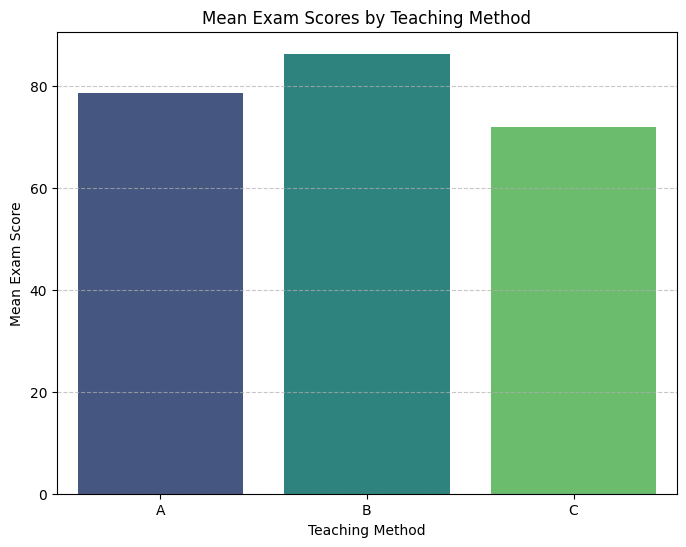

In [ ]:
# put your answer here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Score', data=df_exam_scores, ci=None, palette='viridis')
plt.title('Mean Exam Scores by Teaching Method')
plt.xlabel('Teaching Method')
plt.ylabel('Mean Exam Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [ ]:
from scipy import stats

scores_method_A = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
s_scores_method_B = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
scores_method_C = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']

f_statistic, p_value = stats.f_oneway(scores_method_A, s_scores_method_B, scores_method_C)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05
print(f"Significance level (α): {alpha}")

print("Since the p-value is greater than α, we fail to reject the null hypothesis (H₀).\nThis suggests that there is no statistically significant difference in mean exam scores among the three teaching methods.")

F-statistic: 165.18
P-value: 0.000
Significance level (α): 0.05
Since the p-value is greater than α, we fail to reject the null hypothesis (H₀).
This suggests that there is no statistically significant difference in mean exam scores among the three teaching methods.


Interpret the results. What does it say about the relationship between teaching method and exam scores?

In [ ]:
# put your answer here
"""
Based on the test, with a p-value of 0.000 (which is less than the significance level of 0.05),
we reject the null hypothesis. This means there is a statistically significant difference in mean exam
scores among the three teaching methods. In simpler terms, the teaching method does have a significant effect on student exam scores.
"""

'\nBased on the ANOVA test, with a p-value of 0.000 (which is less than the significance level of 0.05), \nwe reject the null hypothesis. This means there is a statistically significant difference in mean exam \nscores among the three teaching methods. In simpler terms, the teaching method does have a significant effect on student exam scores.\n'

## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [ ]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes
5,6,Male,Yes
6,7,Male,Yes
7,8,Male,Yes
8,9,Male,Yes
9,10,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [ ]:
# put your answer here
gender_counts = df_littering_data['Gender'].value_counts()
litter_counts = df_littering_data['Litter'].value_counts()

print("Gender Counts:")
display(gender_counts)

print("\nLitter Counts:")
display(litter_counts)

Gender Counts:


,count
Gender,
Male,20
Female,20



Litter Counts:


,count
Litter,
No,22
Yes,18


Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [ ]:
# put your answer here
contingency_table = pd.crosstab(df_littering_data['Gender'], df_littering_data['Litter'], margins=True)
display(contingency_table)

Litter,No,Yes,All
Gender,,,
Female,14,6,20
Male,8,12,20
All,22,18,40


State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

In [ ]:
# put your answer here
"""
Null hypothesis (H₀):
There is no significant association between gender and littering behavior.
(Male and female participants have the same distribution of “Yes” and “No” responses.)

Alternative hypothesis (H₁):
There is a significant association between gender and littering behavior.
(The distribution of “Yes” and “No” responses differs between males and females.)
"""

'\nNull hypothesis (H₀):\nThere is no significant association between gender and littering behavior.\n(Male and female participants have the same distribution of “Yes” and “No” responses.)\n\nAlternative hypothesis (H₁):\nThere is a significant association between gender and littering behavior.\n(The distribution of “Yes” and “No” responses differs between males and females.)\n'

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [ ]:
# put your answer here

observed = contingency_table.iloc[:-1, :-1]

chi2_statistic, p_value, dof, expected = chi2_contingency(observed)

print(f"Chi-squared Statistic: {chi2_statistic:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
print(f"Significance level (α): {alpha}")

"""
Since the p-value is greater than α, we fail to reject the null hypothesis (H₀).
This suggests that there is no statistically significant association between gender and littering behavior.
"""

Chi-squared Statistic: 2.53
P-value: 0.112
Degrees of Freedom: 1
Significance level (α): 0.05


'\nSince the p-value is greater than α, we fail to reject the null hypothesis (H₀).\nThis suggests that there is no statistically significant association between gender and littering behavior.\n'

Interpret your results. Is there evidence that gender and littering behavior are associated?

In [ ]:
# put your answer here
"""
Based on the chi-squared test, with a p-value of 0.112 (which is greater than the significance level of 0.05),
we fail to reject the null hypothesis (H₀). This means there is no statistically significant evidence to suggest
an association between gender and littering behavior.
"""